# Защита персональных данных клиентов

## 1 Обзор и подготовка данных

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import copy
import random
from sklearn.metrics import r2_score

In [58]:
df = pd.read_csv('insurance.csv')
display(df)

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
...,...,...,...,...,...
4995,0,28.0,35700.0,2,0
4996,0,34.0,52400.0,1,0
4997,0,20.0,33900.0,2,0
4998,1,22.0,32700.0,3,0


In [59]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
Пол                  5000 non-null int64
Возраст              5000 non-null float64
Зарплата             5000 non-null float64
Члены семьи          5000 non-null int64
Страховые выплаты    5000 non-null int64
dtypes: float64(2), int64(3)
memory usage: 195.4 KB
None


### Поиск дубликатов

In [60]:
print(df.duplicated().sum())

153


In [61]:
df_dubl = df.loc[df.duplicated()]
display(df_dubl)

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
281,1,39.0,48100.0,1,0
488,1,24.0,32900.0,1,0
513,0,31.0,37400.0,2,0
718,1,22.0,32600.0,1,0
785,0,20.0,35800.0,0,0
...,...,...,...,...,...
4793,1,24.0,37800.0,0,0
4902,1,35.0,38700.0,1,0
4935,1,19.0,32700.0,0,0
4945,1,21.0,45800.0,0,0


In [62]:
# для проверки и примера взят один явный дубликат
display(df.loc[(df['Возраст'] == 39.0) & (df['Зарплата'] == 48100.0)])

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
69,1,39.0,48100.0,1,0
281,1,39.0,48100.0,1,0


<b>Действительно в таблице есть явные дубликаты: 153 строки повторяются каждая по 2 раза.</b>

Но при этом, нет однозначного идентификатора клиента типа id, ФИО или чего-то подобного, и мы не можем со 100% уверенностью говорить, являются совпадения дубликатами или нет. Все таки удалим их.

In [63]:
df_new = df.drop_duplicates().reset_index(drop=True)
print(df_new.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4847 entries, 0 to 4846
Data columns (total 5 columns):
Пол                  4847 non-null int64
Возраст              4847 non-null float64
Зарплата             4847 non-null float64
Члены семьи          4847 non-null int64
Страховые выплаты    4847 non-null int64
dtypes: float64(2), int64(3)
memory usage: 189.5 KB
None


In [64]:
display(df_new.head())

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


### Изменение типов данных

<b>Тип данных в столбцах 'Возраст' и 'Зарплата' - float. Изменим данных тип данных на int.</b>

Проведем проверку:

1. Изучим дробную часть для указанных признаков, получив ее как остаток от деления на 1.
2. Сделаем срез данных.

In [65]:
df_new_test = copy.deepcopy(df_new)
df_new_test['Возраст_1'] = df_new_test['Возраст'] % 1
df_new_test['Зарплата_1'] = df_new_test['Зарплата'] % 1
display(df_new_test.query('Возраст_1 > 0.0'))
display(df_new_test.query('Зарплата_1 > 0.0'))

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты,Возраст_1,Зарплата_1


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты,Возраст_1,Зарплата_1
80,1,41.0,32700.0,0,0,0.0,3.637979e-12
159,1,19.0,64900.0,2,0,0.0,7.275958e-12
312,0,25.0,32700.0,1,0,0.0,3.637979e-12
391,1,43.0,32700.0,1,1,0.0,3.637979e-12
447,1,32.0,32700.0,2,0,0.0,3.637979e-12
768,1,20.0,65100.0,1,0,0.0,1.000000e+00
815,0,29.0,32200.0,2,0,0.0,3.637979e-12
866,0,23.0,32200.0,3,0,0.0,3.637979e-12
904,0,30.0,32200.0,0,0,0.0,3.637979e-12
956,1,20.0,64100.0,0,0,0.0,1.000000e+00


В столбце 'Возраст' не оказалось данных с действительно дробной частью - можно менять тип данных на int.
Для столбца 'Зарплата' тоже можно поменять тип данных на int, не смотря на наличие очень небольшого остатка от деления на 1 в вышеуказанных строках, в столбце 'Зарплата' в данных строках дробная часть равна 0.

In [66]:
df_new = df_new.astype(int)
print(df_new.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4847 entries, 0 to 4846
Data columns (total 5 columns):
Пол                  4847 non-null int32
Возраст              4847 non-null int32
Зарплата             4847 non-null int32
Члены семьи          4847 non-null int32
Страховые выплаты    4847 non-null int32
dtypes: int32(5)
memory usage: 94.8 KB
None


### Корреляционный анализ

<b>Проанализуем наши признаки и найдем взаимосвязи между ними</b>

In [67]:
df_cor = df.corr()
df_cor

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
Пол,1.000000,0.002074,0.014910,-0.008991,0.010140
Возраст,0.002074,1.000000,-0.019093,-0.006692,0.651030
Зарплата,0.014910,-0.019093,1.000000,-0.030296,-0.014963
Члены семьи,-0.008991,-0.006692,-0.030296,1.000000,-0.036290
Страховые выплаты,0.010140,0.651030,-0.014963,-0.036290,1.000000


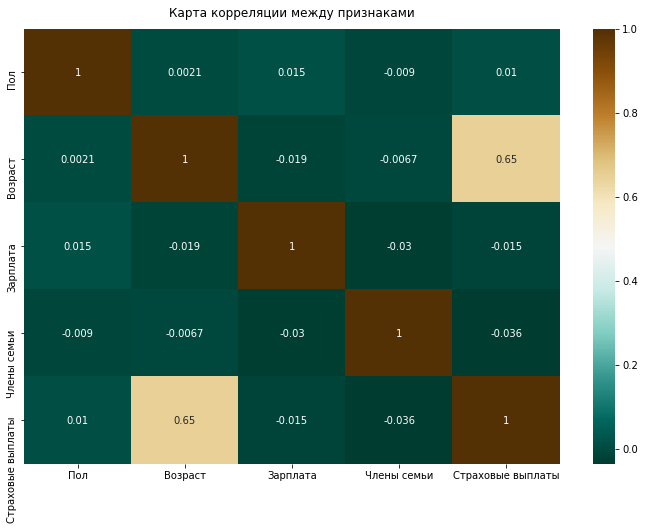

In [72]:
heatmap = plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(df_cor, annot=True, cmap= 'BrBG_r')
heatmap.set_title('Карта корреляции между признаками', fontdict={'fontsize':12}, pad=12)
plt.show()

<b>Проведя корреляционный анализ попарно для признаков и целевого признака можно сказать, что существенная взаимосвязь имеется только между возрастом и количеством страховых выплат (коэффициент корреляции = 65%). Связь положительная, т.е. чем больше возраст, тем больше страховых выплат - все логично.

В связи с этим считаю, что наибольший вес среди всех признаков (и с большим отрывом) при получении Линейной регрессии и соответственно наибольшее влияние будет у признака - Возраст клиентов.</b>

### Частота страховых выплат

<AxesSubplot:title={'center':'Частота страховых выплат'}, ylabel='Frequency'>

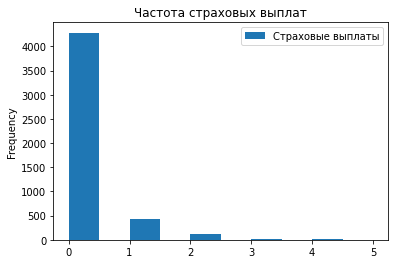

In [59]:
df_new.plot(y='Страховые выплаты', kind='hist', title='Частота страховых выплат')

<b>Частота выплат крайне не высока, что характерно для страховых компаний.</b>

<b>Вывод</b>

1. Представленная таблица данных содержит информацию о застрахованных лицах. Поля: Пол, Возраст, Зарплата, Члены семьи (количество)  являются признаками , а поле Страховые выплаты (за 5 лет) - целевым признаком.

2. Таблица содержит информацию о 5000 клиентах (5000 строк).

3. Пропусков в таблице нет.

4. Типами данных являются int и float.

5. В таблице найдены и удалены 153 явных дубликата.

6. Для столбцов 'Возраст' и 'Зарплата' тип данных заменен на int.

7. Наибольшее и существенное влияние на количество страховых выплат оказывает возраст.

8. Частота выплат крайне не высока.

## 2 Умножение матриц

<b>Задача:</b>

<b>Доказать, что качество линейной регрессии (метрика R2) не изменится, если матрицу признаков умножить случайную квадратную обратимую матрицу с размерностью равной ширине матрицы признаков.</b>

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Обоснование:** 

        Введем обозначения:
- $X$ - матрица признаков;
- $w$ - вектор параметров;
- $a$ - вектор предсказаний для матрицы признаков $X$;
- $P$ - случайная квадратная обратимая матрица, на которую будем умножать матрицу признаков;
- $b$ - вектор предсказаний для матрицы признаков $X$ при её умножении на случайную квадратную обратимую матрицу $P$;
- $E$ - единичная матрица;
- $X^T$ - транспонированная матрица признаков $X$;
- $P^{-1}$ - обратная матрица для матрицы $P$;

      Также мы знаем, что:    
- $a = Xw$ - формула вычисления вектора предсказаний для матрицы признаков $X$;
- $w = (X^T X)^{-1} X^T y$ - формула нахождения вектора параметров $w$;
- $E = P^{-1}P = PP^{-1}$ - скалярное произведение матрицы $P$ и обратной ей матрицы $P^{-1}$ равно единичной матрице $E$ (порядок умножения не важен);
- $P = PE = EP$ - скалярное произведение матрицы $P$ и единичной матрицы $E$ равно матрице $P$ (порядок умножения не важен);

       Свойства транспонируемых и обратных матриц:
- $(AB)^T = B^T A^T$ - свойство транспонированных матриц
- $(AB)^{-1} = B^{-1} A^{-1}$ - свойство обратных матриц
- $(A^T)^{-1} = (A^{-1})^T$ - свойство транспонированных и обратных матриц

<b>Для того, чтобы доказать что качество линейной регрессии не изменится, необходимо доказать, что вектора предсказаний $a$ и $b$ будут равны, т.е. $a = b$.</b>

Напишем формулы вычисления векторов предсказаний $a$ и $b$:

$a = Xw = X(X^T X)^{-1} X^T y$

Кстати обратная матрица $(X^T X)^{-1}$ всегда будет квадратной, т.к. только квадратная матрица может быть обратимой, если бы в нашей формуле матрица $(X^T X)^{-1}$ была бы необратимой, мы не смогли бы найти вектор предсказаний $a$.

$b = XPw^p$:

где = $w^p = ((XP)^T XP)^{-1} (XP)^T y$

$b = XP ((XP)^T XP)^{-1} (XP)^T y$ 

используя свойство $(AB)^T = B^T A^T$, получаем:

$XP ((XP)^T XP)^{-1} (XP)^T y = XP (P^T (X^TX) P)^{-1} P^T X^T y$

используя свойство $(AB)^{-1} = B^{-1} A^{-1}$, получаем:

$XP (P^T (X^TX) P)^{-1} P^T X^T y = XP P^{-1} (P^T (X^TX))^{-1} P^T X^T y = X (P P^{-1}) (X^TX)^{-1} ((P^T)^{-1} P^T) X^T y$

используя свойство $E = P^{-1}P = PP^{-1}$, получаем:

$X (P P^{-1}) (X^TX)^{-1} ((P^T)^{-1} P^T) X^T y = X E (X^TX)^{-1} E X^T y = X (X^TX)^{-1} X^T y$

Получилось $b = X (X^TX)^{-1} X^T y$, $a = X (X^TX)^{-1} X^T y$.

$a = b$, что и требовалось доказать.

## 3 Алгоритм преобразования

**Алгоритм**

1) Имеющиеся табличные данные разделим на матрицу признаков и целевой вектор (features и target).

2) Создадим класс модели LinearRegression() с методами fit() и predict().

3) Проведем обучение модели без умножения на случайую матрицу и получим предсказания. Расчитаем метрику R2 на данной модели.

4) С помощью np.random.normal создадим случайную квадратную обратимую матрицу с размерностью равной ширине матрицы признаков.

5) Проведем преобразование - умножим матрицу признаков на квадратную обратимую матрицу, полученную в предыдущем пункте.

6) Проведем обучение модели с умножения на случайую матрицу и получим предсказания. Расчитаем метрику R2 на данной модели.

7) Напишем вывод.

**Обоснование**

Проверим на практике наше утверждение о том, что качество линейной регрессии (метрика R2) не изменится, если матрицу признаков умножить случайную квадратную обратимую матрицу с размерностью равной ширине матрицы признаков.

## 4 Проверка алгоритма

### Имеющиеся табличные данные разделим на матрицу признаков и целевой вектор (features и target).

In [75]:
display(df_new.head())

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41,49600,1,0
1,0,46,38000,1,1
2,0,29,21000,0,0
3,0,21,41700,2,0
4,1,28,26100,0,0


In [76]:
features = df_new.drop('Страховые выплаты', axis=1).values
target = df_new['Страховые выплаты'].values

### Создадим класс модели LinearRegression() с методами fit() и predict().

In [77]:
class LinearRegression:
    def fit(self, features_train, target_train):
        X = np.concatenate([np.ones((4847, 1)), features_train], axis=1)
        y = target_train
        w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
        self.w = w[1:]
        self.w0 = w[0]
    def predict(self, features_test):
        return np.dot(features_test, self.w) + self.w0

### Проведем обучение модели без умножения на случайую матрицу и получим предсказания. Расчитаем метрику R2 на данной модели.

In [78]:
model = LinearRegression()
model.fit(features, target)
predictions = model.predict(features)
print('Значение метрики R2:', r2_score(target, predictions))

Значение метрики R2: 0.4302010046633359


<b>Значение метрики R2 модели на непреобразованной матрице признаков: 0.4302010044852068</b>

### С помощью np.random.normal создадим случайную квадратную обратимую матрицу с размерностью равной ширине матрицы признаков.

In [79]:
# созадим случайную квадратную матрицу с размерностью равной ширине матрицы признаков
# использование фиксированного псевдо случайного значения
np.random.seed(42) # каждый раз выдает одни и теже псевдо случайные значения для нашей матрицы P
P = np.random.normal(size = (features.shape[1], features.shape[1])) 
print(P)

[[ 0.49671415 -0.1382643   0.64768854  1.52302986]
 [-0.23415337 -0.23413696  1.57921282  0.76743473]
 [-0.46947439  0.54256004 -0.46341769 -0.46572975]
 [ 0.24196227 -1.91328024 -1.72491783 -0.56228753]]


In [80]:
# проверим, что наша квадратная матрица 'P' является обратимой
print(np.linalg.inv(P))

[[-0.33124857 -1.0333483  -2.21070923 -0.47651024]
 [ 0.12864778 -0.47781825  0.15271687 -0.43017975]
 [-0.51338817  0.33588835 -0.8347692  -0.24072429]
 [ 0.99462192  0.15079316  1.08985145  0.21872535]]


<b>Матрица 'P' является обратимой.</b>

### Проведем преобразование - умножим матрицу признаков на квадратную обратимую матрицу, полученную в предыдущем пункте.

In [81]:
features = df_new.drop('Страховые выплаты', axis=1).values
#P = np.random.normal(size = (features.shape[1], features.shape[1])) 
features_new = np.dot(features, P)
target = df_new['Страховые выплаты'].values

### Проведем обучение модели с умножения на случайую матрицу и получим предсказания. Расчитаем метрику R2 на данной модели.

In [160]:
model = LinearRegression()
model.fit(features_new, target)
predictions = model.predict(features_new)
print('Значение метрики R2:', r2_score(target, predictions))

Значение метрики R2: 0.43020100448520027


<b>Значение метрики R2 модели на преобразованной матрице признаков (умноженной на матрицу 'P'): 0.43020100448520027</b>

## 5 Общий вывод

В ходе работы в данном проекте разработан метод преобразования данных, чтобы данные были защищены и по ним было бы сложно восстановить персональную информацию. Таким методом сможет выступать умножение матрицы признаков в нашей таблице данных на случайную квадратную обратимую матрицу с размерностью равной ширине матрицы признаков.

При этом, при использовании указанного преобразования данных качество моделей машинного обучения не ухудшается.

Данный факт сначало был доказан теоретически с помощью векторизованных формул (пункт 2), а затем подтвержден практически (пункт 4) на модели LinearRegression() при вычислении и сравнении метрики качества R2 до и после преобразования матрицы признаков.

В итоге значение метрики R2 до преобразования матрицы признаков равно 0.4302010044852068, после преобразования - 0.43020100448520027. Как видим значения качества модели равны до и после преобразования.